In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/healthcare-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.91M/2.91M [00:02<00:00, 1.52MB/s]

Extracting files...


Path to dataset files: C:\Users\bhatt\.cache\kagglehub\datasets\prasad22\healthcare-dataset\versions\2


In [25]:
data=pd.read_csv("healthcare_dataset.csv")


In [26]:
data.head() 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
for col in data.columns:
    print(col, data[col].unique())
    data[col].hist()
    plt.show()

In [27]:
columns=['Age','Gender','Blood Type','Medical Condition']
enc=pd.get_dummies(data[columns])
data=pd.concat([data,enc],axis=1)
data.drop(columns, axis=1, inplace=True)

In [30]:
print(data.columns)




Index(['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Gender_Female', 'Gender_Male',
       'Blood Type_A+', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-',
       'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-',
       'Medical Condition_Arthritis', 'Medical Condition_Asthma',
       'Medical Condition_Cancer', 'Medical Condition_Diabetes',
       'Medical Condition_Hypertension', 'Medical Condition_Obesity'],
      dtype='object')


In [31]:
columns_to_drop = ['Name', 'Date of Admission', 'Doctor', 'Hospital', 
                   'Insurance Provider', 'Room Number', 'Discharge Date', 'Medication']

data = data.drop(columns=columns_to_drop, axis=1)


In [22]:
!pip install interpret imblearn

In [33]:
# Encode categorical column 'Admission Type'
data = pd.get_dummies(data, columns=['Admission Type'], prefix='AdmissionType')

# Verify if encoding worked
print(data.head())


   Billing Amount  Test Results  Gender_Female  Gender_Male  Blood Type_A+  \
0    18856.281306        Normal          False         True          False   
1    33643.327287  Inconclusive          False         True           True   
2    27955.096079        Normal           True        False          False   
3    37909.782410      Abnormal           True        False          False   
4    14238.317814      Abnormal           True        False          False   

   Blood Type_A-  Blood Type_AB+  Blood Type_AB-  Blood Type_B+  \
0          False           False           False          False   
1          False           False           False          False   
2           True           False           False          False   
3          False           False           False          False   
4          False            True           False          False   

   Blood Type_B-  ...  Blood Type_O-  Medical Condition_Arthritis  \
0           True  ...          False                       

In [34]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Transform the 'Test Results' column into numbers
data['Test Results'] = label_encoder.fit_transform(data['Test Results'])

# Check unique values after encoding
print(data['Test Results'].unique())


[2 1 0]


(55500, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memor

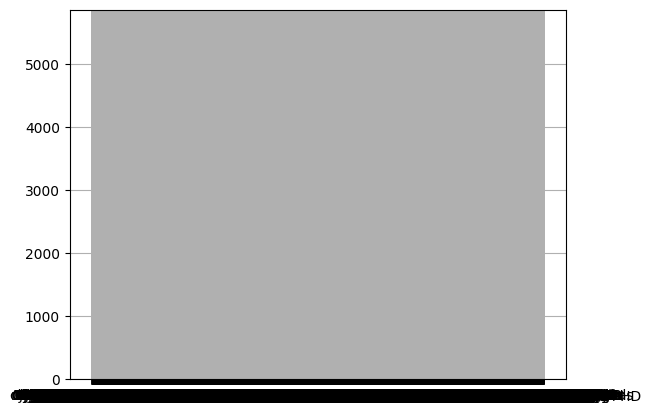

col:  Age


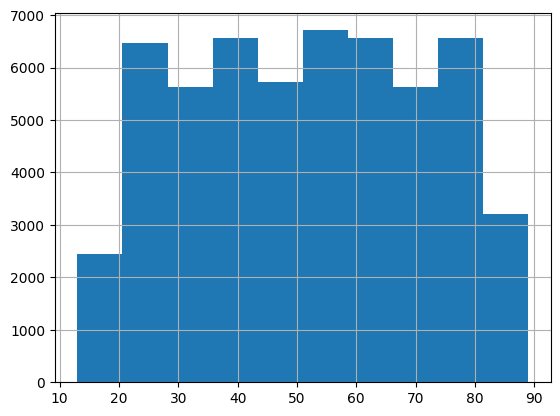

col:  Gender


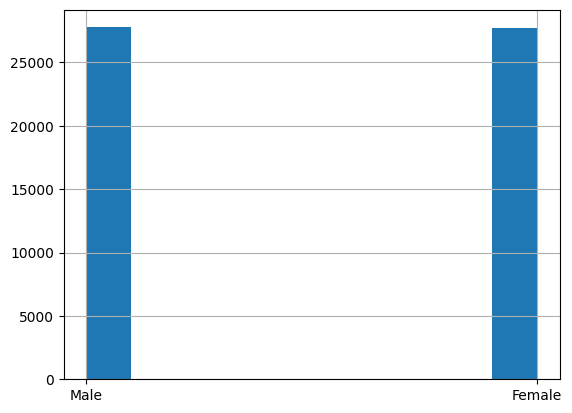

col:  Blood Type


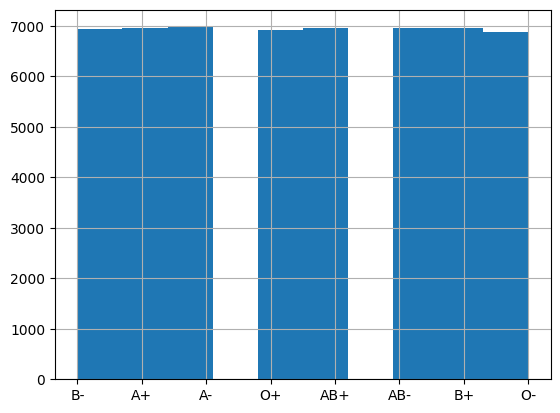

col:  Medical Condition


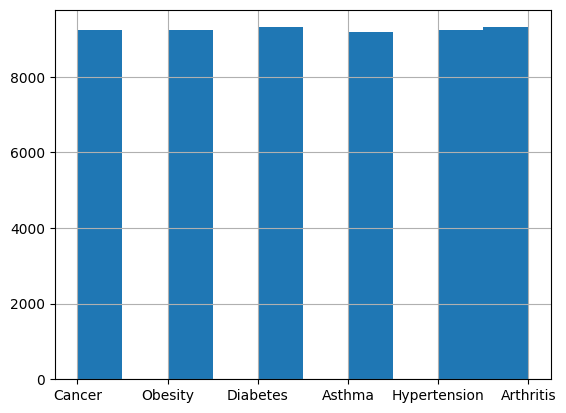

col:  Date of Admission


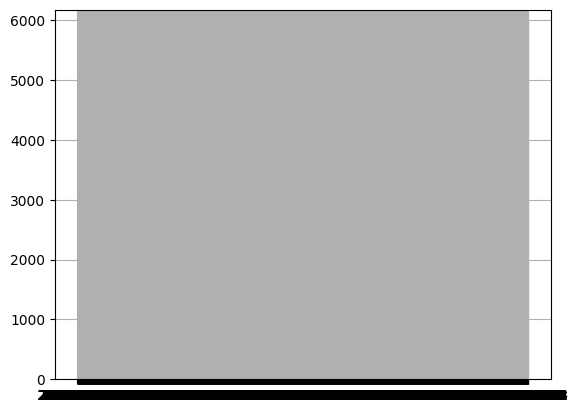

col:  Doctor


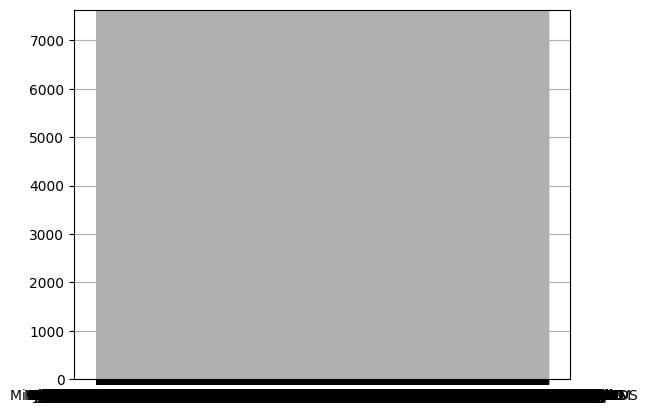

col:  Hospital


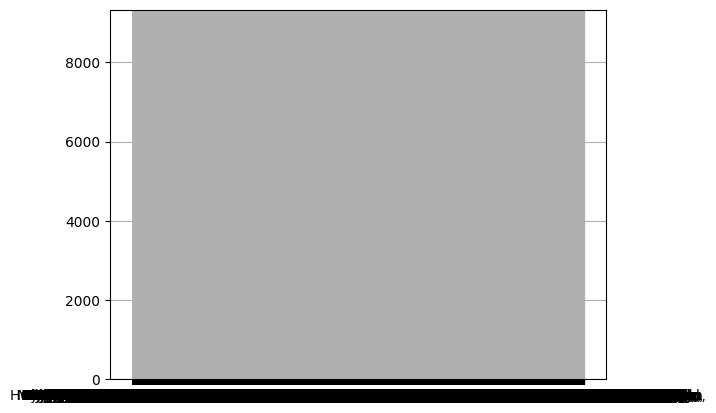

col:  Insurance Provider


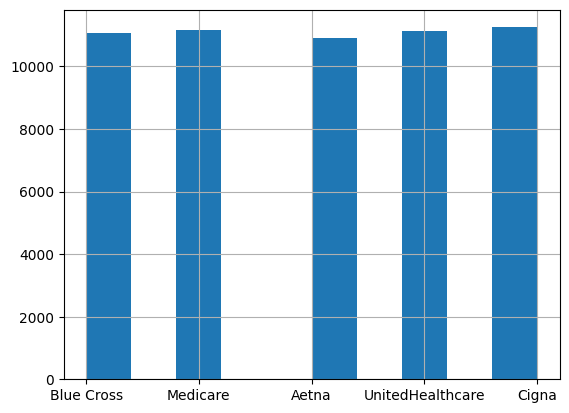

col:  Billing Amount


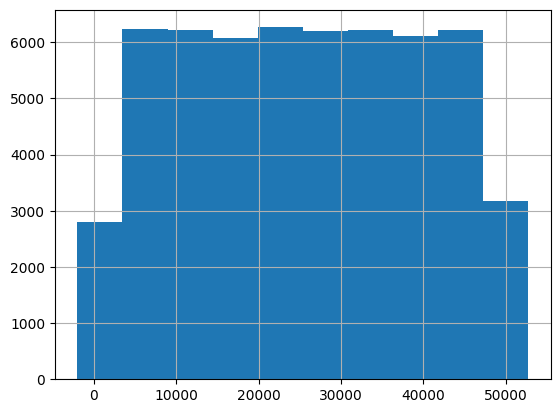

col:  Room Number


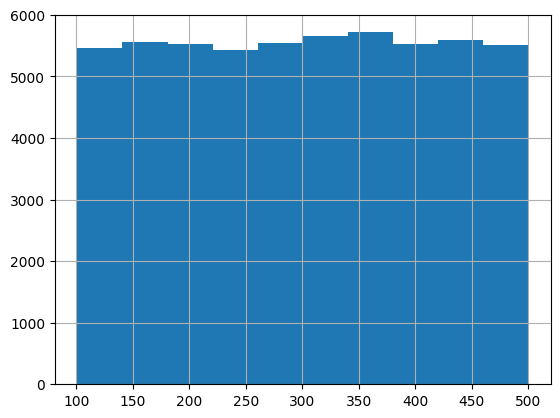

col:  Admission Type


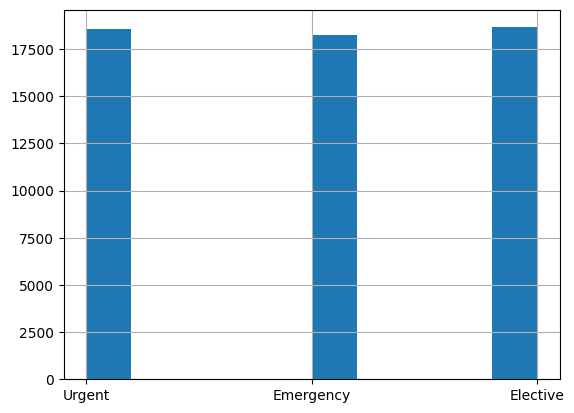

col:  Discharge Date


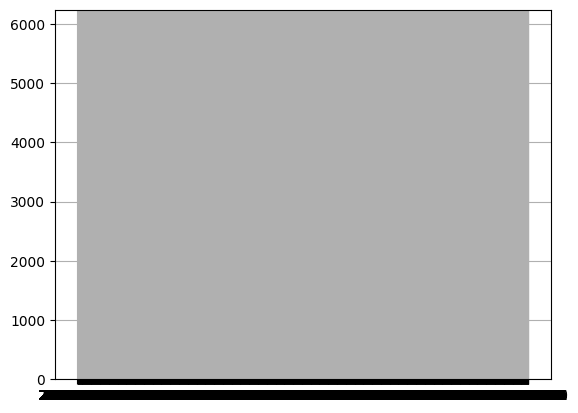

col:  Medication


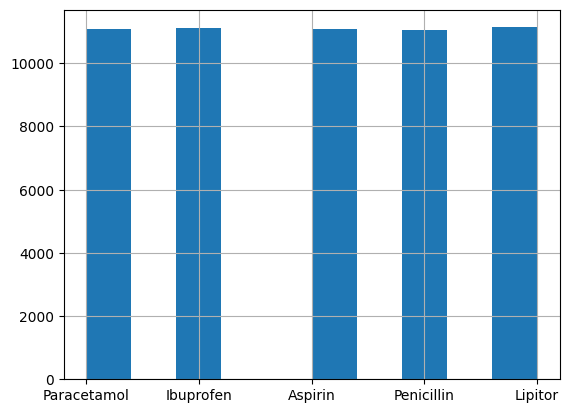

col:  Test Results


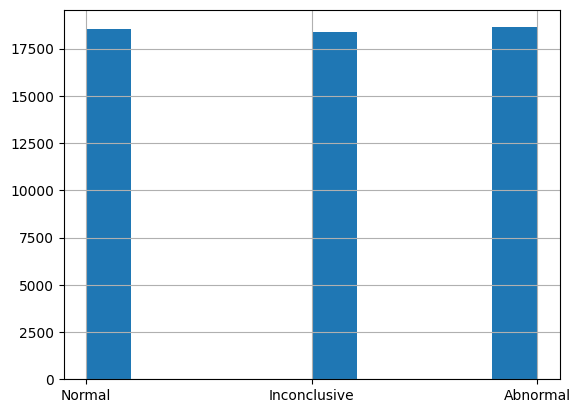

KeyError: "None of [Index(['gender', 'ever_married', 'work_type', 'Residence_type',\n       'smoking_status'],\n      dtype='object')] are in the [columns]"

In [40]:
import matplotlib.pyplot as plt
from Utils import DataLoader

# %% Load data
data_loader = DataLoader()
data_loader.load_dataset()
data = data_loader.data

# %% Show head
print(data.shape)
data.head()

# %% Show general statistics
data.info()

# %% Show histogram for all columns
columns = data.columns
for col in columns:
    print("col: ", col)
    data[col].hist()
    plt.show()

# %% Show preprocessed dataframe
data_loader.preprocess_data()


In [ ]:
from Utils import DataLoader
from interpret.glassbox import (LogisticRegression,
                                ClassificationTree, 
                                ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score

# %% Load and preprocess data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()

# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
print(X_train.shape)
print(X_test.shape)